<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Exercise_11_Imbalance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### PYTHON EXERCISE : IMBALANCE CLASSIFICATION

   Analyze data bankloan.csv

1. build a logistics regression model
2. target : default
3. features : employ, debtinc, creddebt, othdebt
4. Explore the class distribution
5. Random state 2020, stratified training 60% validation 20% testing 20%
6. Modeling evaluate by f1 score in test set:
*   logistic regression without any treatment
*   logistic regression that optimized by the threshold
*   logistic regression with random undersampling
*   Penalized logistic regression

In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [ ]:
y = bankloan['default']
X = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]

In [ ]:
y.value_counts()/ bankloan.shape[0] * 100

0    73.857143
1    26.142857
Name: default, dtype: float64

In [ ]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=test_size)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=val_size/(train_size+val_size))

1. Logistic Regression w/o Any Treatment

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_val, y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       103
           1       0.83      0.54      0.66        37

    accuracy                           0.85       140
   macro avg       0.84      0.75      0.78       140
weighted avg       0.85      0.85      0.84       140



2. Logistic Regression that Optimized by Threshold

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
th_value = [i/100 for i in range(20,60)]

In [ ]:
score = 0
score_list = []

for i in th_value:
  y_prob = logreg.predict_proba(X_val)[:,1]
  y_pred = np.where(y_prob > i, 1, 0)

  score_temp = f1_score(y_val, y_pred)
  score_list.append(score_temp)

  if score_temp > score:
    score = score_temp
    best_score = score
    best_th = i

In [ ]:
best_score

0.6285714285714286

In [ ]:
best_th

0.2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


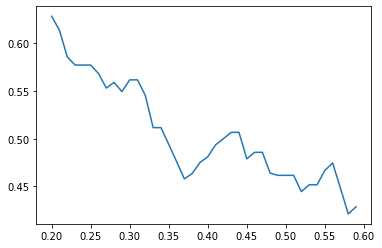

In [ ]:
sns.lineplot(th_value, score_list)

In [ ]:
logreg.fit(X_train_val, y_train_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > best_th, 1, 0)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76       103
           1       0.45      0.76      0.57        37

    accuracy                           0.69       140
   macro avg       0.67      0.71      0.66       140
weighted avg       0.77      0.69      0.71       140



3. Logistic Regression with Random Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=10)
X_rus, y_rus = rus.fit_resample(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
logreg.fit(X_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       103
           1       0.49      0.73      0.59        37

    accuracy                           0.73       140
   macro avg       0.69      0.73      0.69       140
weighted avg       0.78      0.73      0.74       140



4. Penalized Logistic Regression

In [ ]:
pen_logreg = LogisticRegression(class_weight='balanced')

In [ ]:
pen_logreg.fit(X_train_val, y_train_val)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = pen_logreg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       103
           1       0.54      0.76      0.63        37

    accuracy                           0.76       140
   macro avg       0.72      0.76      0.73       140
weighted avg       0.80      0.76      0.77       140



### PYTHON EXERCISE : COMBINE CROSS VALIDATION WITH BALANCING METHOD

 Analyze data bankloan.csv

1. build a logistics regression model
 * target : default
 * features : employ, debtinc, creddebt, othdebt
2. Random state 2020, stratified training 60% validation 20% testing 20%
3. Modeling evaluate by f1 score using Strat. CV 5 Fold:
 * Penalized logistic regression
 * Logistic regression with SMOTE

Which method is better

In [ ]:
y = bankloan['default']
X = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]

In [ ]:
train_size = 0.6
val_size = 0.2
test_size = 0.2

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=test_size)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=val_size/(train_size+val_size))

1. Penalized Logistic Regression

In [ ]:
skf = StratifiedKFold(n_splits=5)

In [ ]:
pen_logreg = LogisticRegression(class_weight='balanced')
print('f1 score :', np.mean(cross_val_score(pen_logreg, X_train_val, y_train_val, cv=skf, scoring='f1')))

f1 score : 0.6019797189112258


2. Logistic Regression with SMOTE

In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
logreg = LogisticRegression(solver='liblinear')
print('f1 score :', np.mean(cross_val_score(logreg, X_smote, y_smote, cv=skf, scoring='f1')))

f1 score : 0.7649561639440183


### PYTHON EXERCISE : COMBINE HYPERPARAMETER TUNING WITH BALANCING METHOD

In [ ]:
y = bankloan['default']
X = bankloan[['employ', 'debtinc', 'creddebt', 'othdebt']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2021)

In [ ]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1. kNN with SMOTE

Using Cross Val Score

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
params = {'n_neighbors': [3,4,5]}

In [ ]:
f1 = []
best_f1 = 0

for k in params['n_neighbors']:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = (np.mean(cross_val_score(knn, X_smote, y_smote, scoring='f1', cv=5)))
  f1.append(score)

  if score > best_f1:
    best_f1 = score
    best_k = k

In [ ]:
print(best_f1)
print(best_k)

0.8007672796268503
3


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_smote, y_smote)
y_pred_1 = knn.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       155
           1       0.40      0.58      0.47        55

    accuracy                           0.66       210
   macro avg       0.61      0.63      0.61       210
weighted avg       0.71      0.66      0.67       210



Using Grid Search

In [ ]:
grid = GridSearchCV(knn, param_grid=params, scoring='f1', n_jobs=-1, cv=5)

In [ ]:
grid.fit(X_smote, y_smote)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75       155
           1       0.40      0.58      0.47        55

    accuracy                           0.66       210
   macro avg       0.61      0.63      0.61       210
weighted avg       0.71      0.66      0.67       210



In [ ]:
grid.best_params_

{'n_neighbors': 3}

2. Logistic Regression with SMOTE

In [ ]:
logreg = LogisticRegression()

In [ ]:
params = {'C': [0.0001, 0.0005], 'solver': ['liblinear', 'lbfgs']}

In [ ]:
grid = GridSearchCV(logreg, param_grid=params, scoring='f1', n_jobs=-1, cv=5)

In [ ]:
grid.fit(X_smote, y_smote)
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.65      0.77       155
           1       0.48      0.93      0.63        55

    accuracy                           0.72       210
   macro avg       0.72      0.79      0.70       210
weighted avg       0.84      0.72      0.74       210

